### Домашнее задание "Методология ведения DS-проектов"

Возьмите задачу с винами (www.kaggle.com...ne-quality) и решите ее, оформив в виде CrispDM-подхода.  
Решение - jupyter notebook на github или colab. 

### 1. Понимание бизнеса

#### 1.1 Цель

Прогноз качества вина

#### 1.2 Информация о наборе данных

Набор данных был загружен из репозитория машинного обучения UCI.  

Эти два набора данных относятся к красному и белому вариантам португальского вина "Винью Верде".  
Из-за проблем с конфиденциальностью и логистики доступны только физико-химические (исходные данные) и сенсорные (выходные данные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. Д.).  

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин можно перекусить больше, чем отличных или плохих). Алгоритмы обнаружения выбросов могут использоваться для обнаружения нескольких отличных или плохих вин. Кроме того, мы не уверены, все ли входные переменные актуальны. Так что было бы интересно протестировать методы выбора функций.  

Два набора данных были объединены, и несколько значений были удалены случайным образом.  

Информация об атрибутах:  

Для получения дополнительной информации прочтите [Cortez et al., 2009].  
Входные переменные (на основе физико-химических тестов):  
1 - фиксированная кислотность  
2 - летучая кислотность  
3 - лимонная кислота  
4 - остаточный сахар  
5 - хлориды  
6 - свободный диоксид серы  
7 - общий диоксид серы  
8 - плотность  
9 - pH  
10 - сульфаты  
11 - спирт  
Выходная переменная (на основе сенсорных данных):  
12 - качество (оценка от 0 до 10)  

### 2. Data Understanding

#### 2.1 Import Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Modelling Algorithms
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

### 2.2 Вспомогательные функции

### 2.3 Загрузка данных

In [2]:
df = pd.read_csv(r"C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Работа с заказчиком\Методология ведения DS-проектов\winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2.4 Статистика и визуализация

#### 2.4.1 Описательная статистика датасета. Метод ".describe()"

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# посмотрим на соотношение пропусков в столбцах (процент)
for col in df.columns:
    miss = round(df[col].isnull().mean()*100,2)
    if miss > 0:
        print(col, '-', miss, '%')

fixed acidity - 0.15 %
volatile acidity - 0.12 %
citric acid - 0.05 %
residual sugar - 0.03 %
chlorides - 0.03 %
pH - 0.14 %
sulphates - 0.06 %


#### 2.4.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

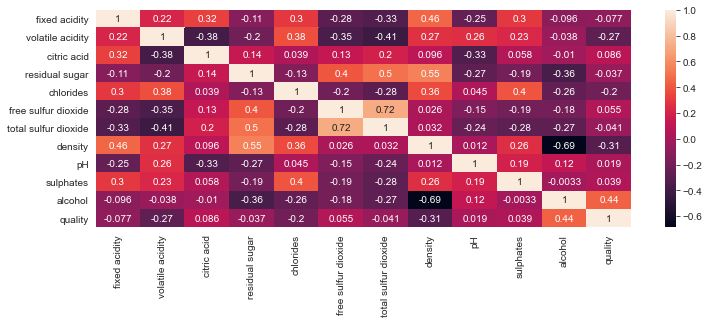

In [6]:
corr = df.corr()   # Пирсона
plt.figure(figsize=[12,4])
sns.heatmap(corr, annot=True)

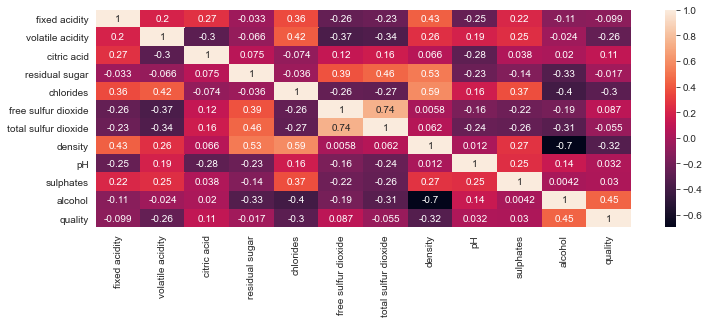

In [7]:
corr2 = df.corr(method = 'spearman')
plt.figure(figsize=[12,4])
sns.heatmap(corr2, annot=True)

Признаки с высокой положительной корреляцией между собой:  
- 'total sulfur dioxide' и 'residual sugar',   
- 'density' и 'residual sugar',  
- 'total sulfur dioxide' и 'free sulfur dioxide'  

Признаки с высокой обратной корреляцией между собой: 
- 'density' и 'alcohol' (плотность и спирт)  

Можно будет попробовать удалить из датасета высоко коррелируемые между собой признаки.  

Явного признака с сильной корреляцией с таргет-переменной 'quality' нет.  
Признак с низкой корреляцией с таргет-переменной 'quality' - 'pH'.  

In [8]:
#sns.pairplot(df)

### 3. Data Preparation

#### 3.1 Числовые и категориальные переменные (тип данных в признаках/столбцах)
Датасет "df" заполнен числовыми переменными, кроме первого столбца "type".  
Таргет 'quality' представлена числовыми переменными.  
К столбцу "type" применим One-Hot Encoding (pd.get_dummies)

In [9]:
# находим категориальные признаки (общий вид)
categor = list(df.dtypes[df.dtypes == object].index)
len(categor)

1

In [10]:
df = pd.get_dummies(df, columns=['type'], prefix_sep='_')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


#### 3.2 Пропуски
Столбцы: "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "pH", "sulphates" - имеют незначительные пропуски, не более 0,15%. Такие пропуски реально восстановить стат.данными или удалить.

In [11]:
# data.loc[pd.isnull(data['fixed acidity']), :]
df.loc[df['fixed acidity'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
17,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,0,1
174,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,0,1
249,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5,0,1
267,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5,0,1
368,NaN,0.290,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.6,6,0,1
518,NaN,0.130,0.28,1.9,0.050,20.0,78.0,0.99180,3.43,0.64,10.8,6,0,1
1079,NaN,NaN,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,6,0,1
2902,NaN,0.360,0.14,8.9,0.036,38.0,155.0,0.99622,3.27,NaN,9.4,5,0,1
6428,NaN,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,NaN,0.69,11.3,6,1,0
6429,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5,1,0


In [12]:
df.loc[(df['citric acid']==0.48)&(df['volatile acidity']==0.66)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
17,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,0,1
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,0,1


In [13]:
df.iloc[17,0]=6.2
df.loc[(df['citric acid']==0.48)&(df['volatile acidity']==0.270)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
28,7.4,0.27,0.48,1.1,0.047,17.0,132.0,0.99140,3.19,0.49,11.6,6,0,1
2808,7.0,0.27,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4,6,0,1


In [14]:
df.loc[df['volatile acidity'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
86,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6,0,1
521,7.9,NaN,0.26,2.1,0.039,8.0,143.0,0.99420,3.05,0.74,9.8,5,0,1
621,6.5,NaN,0.43,8.9,0.083,50.0,171.0,0.99650,2.85,0.50,9.0,5,0,1
812,6.4,NaN,0.28,1.1,0.055,9.0,160.0,0.99405,3.42,0.50,9.1,7,0,1
1079,NaN,NaN,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,6,0,1
2894,6.4,NaN,0.36,1.4,0.044,22.0,68.0,0.99014,3.15,0.50,11.7,7,0,1
4895,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
6486,7.2,NaN,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6,1,0


In [15]:
df.loc[(df['fixed acidity']==7.2)&(df['citric acid']==0.63)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
86,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,6,0,1
90,7.2,0.39,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,6,0,1


In [16]:
df.iloc[86,1]=0.39
df.loc[(df['fixed acidity']==7.2)&(df['citric acid']==0.63)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
86,7.2,0.39,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,6,0,1
90,7.2,0.39,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,6,0,1


Можно попытаться "вытащить" подобным образом пропущенные значения или заполнить пропуски средним/медианным значением. 
Но, поскольку пропусков очень мало, предлагаю их просто удалить.

In [17]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6465 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6465 non-null   float64
 1   volatile acidity      6465 non-null   float64
 2   citric acid           6465 non-null   float64
 3   residual sugar        6465 non-null   float64
 4   chlorides             6465 non-null   float64
 5   free sulfur dioxide   6465 non-null   float64
 6   total sulfur dioxide  6465 non-null   float64
 7   density               6465 non-null   float64
 8   pH                    6465 non-null   float64
 9   sulphates             6465 non-null   float64
 10  alcohol               6465 non-null   float64
 11  quality               6465 non-null   int64  
 12  type_red              6465 non-null   uint8  
 13  type_white            6465 non-null   uint8  
dtypes: float64(11), int64(1), uint8(2)
memory usage: 669.2 KB


In [18]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_red                0
type_white              0
dtype: int64

#### 3.3 Выбросы

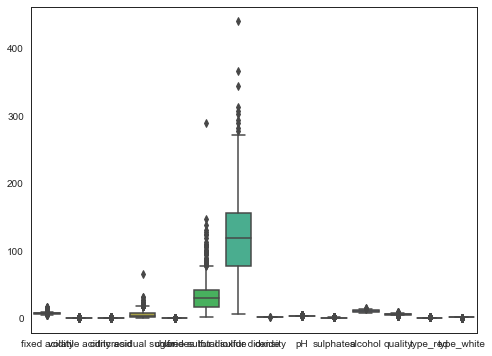

In [19]:
sns.boxplot(data=df)

In [20]:
# прологарифмируем признаки с большими хвостами и широким диапазоном значений: 'free sulfur dioxide', 'total sulfur dioxide'
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'] + 0.0001).to_numpy()

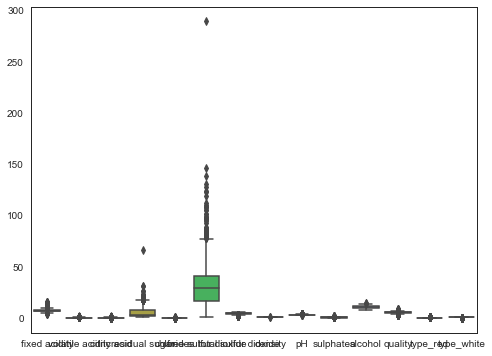

In [21]:
# посмотрим, что получили
sns.boxplot(data=df)

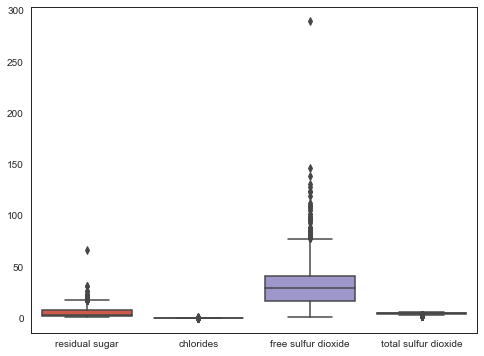

In [22]:
sns.boxplot(data=df.iloc[:,np.arange(3,7)])

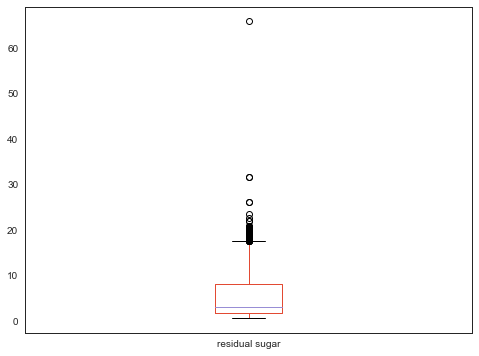

In [23]:
_, bp = df['residual sugar'].plot.box(return_type='both')

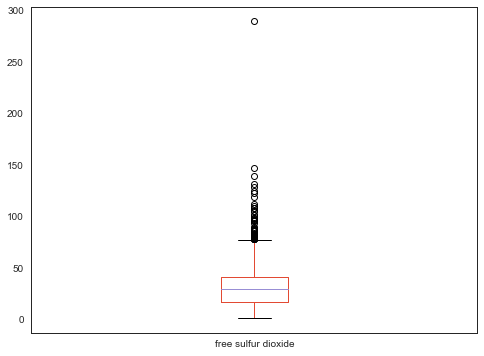

In [24]:
_, bp = df['free sulfur dioxide'].plot.box(return_type='both')

In [25]:
# выведем выбросы data['residual sugar', 'free sulfur dioxide'] через boxplot
# получим точки с графика и выведем их в таблице, используя объект bp

outliers = [flier.get_ydata() for flier in bp['fliers']][0]
dbox = df[df['residual sugar'].isin(outliers)]
dbox = df[df['free sulfur dioxide'].isin(outliers)]
dbox

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
67,6.7,0.25,0.13,1.2,0.041,81.0,5.159056,0.99200,3.14,0.42,9.8,5,0,1
297,7.2,0.19,0.46,3.8,0.041,82.0,5.231109,0.99320,3.19,0.60,11.2,7,0,1
325,7.5,0.27,0.31,5.8,0.057,131.0,5.746204,0.99460,3.18,0.59,10.5,5,0,1
387,6.3,0.39,0.35,5.9,0.040,82.5,5.560682,0.99410,3.12,0.66,10.1,5,0,1
395,6.8,0.27,0.12,1.3,0.040,87.0,5.123965,0.99200,3.18,0.41,10.0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,6.9,0.24,0.40,15.4,0.052,81.0,5.288268,0.99860,3.20,0.69,9.4,5,0,1
4185,6.9,0.24,0.40,15.4,0.052,81.0,5.288268,0.99860,3.20,0.69,9.4,5,0,1
4523,6.7,0.18,0.25,14.3,0.048,79.0,5.003947,0.99750,3.12,0.37,9.7,5,0,1
4745,6.1,0.26,0.25,2.9,0.047,289.0,6.086775,0.99314,3.44,0.64,10.5,3,0,1


In [26]:
dbox['residual sugar'].unique()

array([ 1.2 ,  3.8 ,  5.8 ,  5.9 ,  1.3 ,  9.1 ,  6.6 ,  1.4 , 10.  ,
       14.  , 13.4 , 12.5 ,  6.7 ,  1.45,  8.9 ,  1.55,  8.7 , 11.8 ,
       10.2 ,  2.  , 17.8 ,  4.8 , 10.4 ,  0.95, 12.4 ,  1.8 ,  1.7 ,
        4.1 ,  8.5 , 11.3 ,  3.85,  9.7 ,  4.7 , 12.9 , 11.1 ,  4.5 ,
       15.4 , 14.3 ,  2.9 ,  1.1 ])

In [27]:
dbox['free sulfur dioxide'].unique()

array([ 81. ,  82. , 131. ,  82.5,  87. ,  83. ,  79. , 122.5,  78. ,
        80. ,  88. ,  77.5, 118.5,  96. , 146.5, 128. , 110. ,  85. ,
        89. ,  86. ,  93. , 138.5,  95. , 124. , 105. , 101. , 108. ,
        79.5,  98. , 112. , 289. ,  97. ])

In [28]:
# удалим выбросы dbox там, где нет пропуска (общий вид)

row_del = df.loc[dbox.loc[~pd.isnull(dbox['quality']), :].index, :].index
df = df.drop(row_del, axis=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,5.135799,1.00100,3.00,0.45,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,4.882803,0.99400,3.30,0.49,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,4.574712,0.99510,3.26,0.44,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,5.225747,0.99560,3.19,0.40,9.9,6,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,5.225747,0.99560,3.19,0.40,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,3.637589,0.99651,3.42,0.82,9.5,6,1,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.784192,0.99490,3.45,0.58,10.5,5,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,3.688882,0.99574,3.42,0.75,11.0,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.784192,0.99547,3.57,0.71,10.2,5,1,0


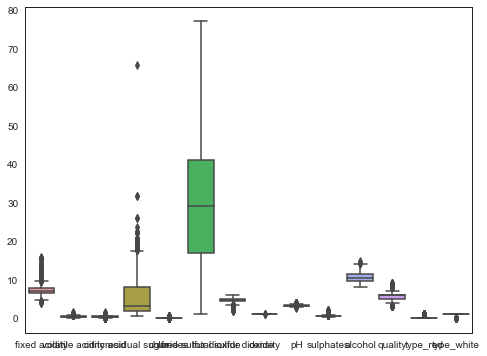

In [29]:
# посмотрим, что получили
sns.boxplot(data=df)

#### 3.4 Feature Engineering – добавляем новые признаки

In [30]:
df['Excellent quality'] = [ 1 if x>=7 else 0 for x in df.quality] 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white,Excellent quality
0,7.0,0.270,0.36,20.7,0.045,45.0,5.135799,1.00100,3.00,0.45,8.8,6,0,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,4.882803,0.99400,3.30,0.49,9.5,6,0,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,4.574712,0.99510,3.26,0.44,10.1,6,0,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,5.225747,0.99560,3.19,0.40,9.9,6,0,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,5.225747,0.99560,3.19,0.40,9.9,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,3.637589,0.99651,3.42,0.82,9.5,6,1,0,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.784192,0.99490,3.45,0.58,10.5,5,1,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,3.688882,0.99574,3.42,0.75,11.0,6,1,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.784192,0.99547,3.57,0.71,10.2,5,1,0,0


#### 3.5 Балланс классов

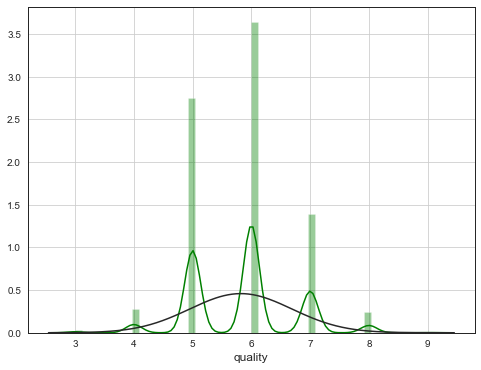

In [31]:
# проверим нормальное распределение целевой переменной
from scipy.stats import norm

sns.distplot(df['quality'], fit=norm, kde=True, color='g')
plt.grid()

# имеются большие выбросы

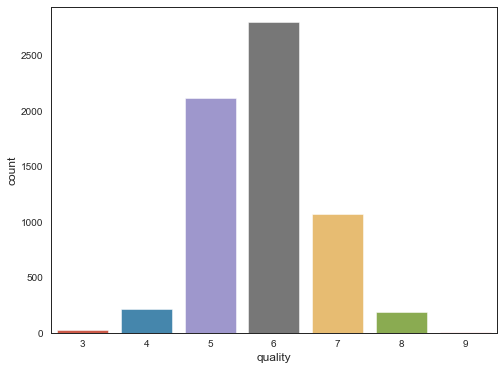

In [32]:
sns.countplot(df['quality'])
plt.show()

In [33]:
# распределение классов
df['quality'].value_counts()

6    2795
5    2109
7    1068
4     212
8     188
3      26
9       5
Name: quality, dtype: int64

Как видно, классы являются несбаллансированными.   
Удалим дубликаты строк, которые мы заметили ранее при анализе пропусков.  

In [34]:
df.drop_duplicates(keep='first', inplace=True)

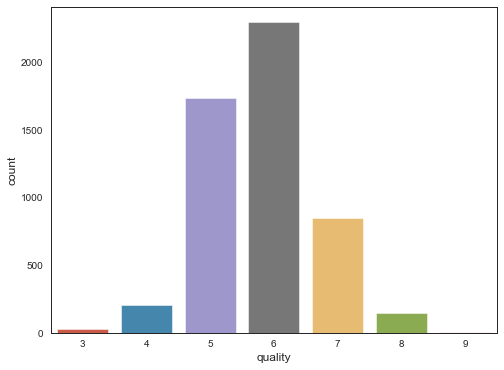

In [35]:
# проверим балланс классов после удаления дубликатов строк
sns.countplot(df['quality'])
plt.show()

Дисбалланс классов сохраняется. Можно:
- сгенерировать синтетические данные (недосемплирование, пересемплирование, например, SMOTE из библиотеки imblearn) 
- установить нужный параметр "веса объекта" из библиотеки sklearn class_weight='balanced'
- выбрать функцию ошибки, не зависящую от балланса классов 'logloss', 'ROC AUC'
- в случае бинарной классификации можно было бы поработать с порогом

#### 3.6 Создание датасета

In [36]:
data = df.drop(['quality'], axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white,Excellent quality
0,7.0,0.270,0.36,20.7,0.045,45.0,5.135799,1.00100,3.00,0.45,8.8,0,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,4.882803,0.99400,3.30,0.49,9.5,0,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,4.574712,0.99510,3.26,0.44,10.1,0,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,5.225747,0.99560,3.19,0.40,9.9,0,1,0
6,6.2,0.320,0.16,7.0,0.045,30.0,4.912656,0.99490,3.18,0.47,9.6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,6.3,0.510,0.13,2.3,0.076,29.0,3.688882,0.99574,3.42,0.75,11.0,1,0,0
6491,6.8,0.620,0.08,1.9,0.068,28.0,3.637589,0.99651,3.42,0.82,9.5,1,0,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.784192,0.99490,3.45,0.58,10.5,1,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.784192,0.99547,3.57,0.71,10.2,1,0,0


In [37]:
# наша целевая переменная
target = df['quality']

In [38]:
# стандартизация данных
data = pd.DataFrame(StandardScaler().fit_transform(data))
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.168698,-0.444093,0.279970,3.488721,-0.318905,0.953109,0.829308,2.176862,-1.403074,-0.555028,-1.476801,-0.589531,0.589531,-0.4841
1,-0.697976,-0.266092,0.144247,-0.763460,-0.210289,-0.942594,0.478332,-0.179247,0.470708,-0.287896,-0.887599,-0.589531,0.589531,-0.4841
2,0.663024,-0.384759,0.551415,0.416465,-0.183136,0.035833,0.050925,0.190999,0.220870,-0.621812,-0.382569,-0.589531,0.589531,-0.4841
3,-0.017476,-0.681428,0.008525,0.772669,0.034095,1.075412,0.954091,0.359292,-0.216346,-0.888944,-0.550913,-0.589531,0.589531,-0.4841
4,-0.773587,-0.147424,-1.077256,0.438728,-0.318905,0.035833,0.519747,0.123681,-0.278805,-0.421462,-0.803428,-0.589531,0.589531,-0.4841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,-0.697976,0.979918,-1.280840,-0.607621,0.522864,-0.025319,-1.177966,0.406414,1.220220,1.448466,0.374976,1.696263,-1.696263,-0.4841
5242,-0.319920,1.632589,-1.620146,-0.696671,0.305633,-0.086470,-1.249123,0.665586,1.220220,1.915948,-0.887599,1.696263,-1.696263,-0.4841
5243,-0.773587,1.513922,-1.620146,-0.674409,0.903017,0.158137,-1.045744,0.123681,1.407599,0.313153,-0.045883,1.696263,-1.696263,-0.4841
5244,-1.000420,1.780924,-1.348701,-0.674409,0.495710,0.158137,-1.045744,0.315536,2.157111,1.181334,-0.298398,1.696263,-1.696263,-0.4841


#### 3.7 Важность признаков

In [39]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(data, target)

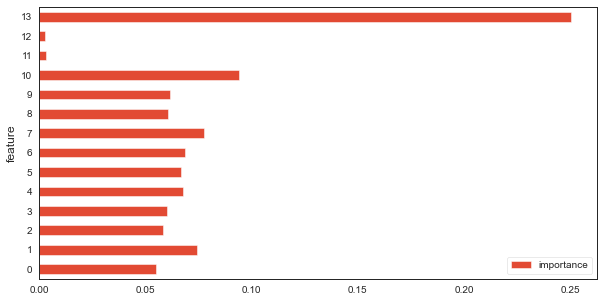

In [40]:
features = pd.DataFrame()
features['feature'] = data.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 5))

Признаки типа вина (красное, белое) не имеют важности для target, исключим их из data

In [41]:
data = data.drop([11, 12], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,10,13
0,-0.168698,-0.444093,0.279970,3.488721,-0.318905,0.953109,0.829308,2.176862,-1.403074,-0.555028,-1.476801,-0.4841
1,-0.697976,-0.266092,0.144247,-0.763460,-0.210289,-0.942594,0.478332,-0.179247,0.470708,-0.287896,-0.887599,-0.4841
2,0.663024,-0.384759,0.551415,0.416465,-0.183136,0.035833,0.050925,0.190999,0.220870,-0.621812,-0.382569,-0.4841
3,-0.017476,-0.681428,0.008525,0.772669,0.034095,1.075412,0.954091,0.359292,-0.216346,-0.888944,-0.550913,-0.4841
4,-0.773587,-0.147424,-1.077256,0.438728,-0.318905,0.035833,0.519747,0.123681,-0.278805,-0.421462,-0.803428,-0.4841
...,...,...,...,...,...,...,...,...,...,...,...,...
5241,-0.697976,0.979918,-1.280840,-0.607621,0.522864,-0.025319,-1.177966,0.406414,1.220220,1.448466,0.374976,-0.4841
5242,-0.319920,1.632589,-1.620146,-0.696671,0.305633,-0.086470,-1.249123,0.665586,1.220220,1.915948,-0.887599,-0.4841
5243,-0.773587,1.513922,-1.620146,-0.674409,0.903017,0.158137,-1.045744,0.123681,1.407599,0.313153,-0.045883,-0.4841
5244,-1.000420,1.780924,-1.348701,-0.674409,0.495710,0.158137,-1.045744,0.315536,2.157111,1.181334,-0.298398,-0.4841


#### 3.8 PCA (убираем шум)

In [42]:
pca = PCA(n_components = 12, random_state=42)
data = pd.DataFrame(pca.fit_transform(data), columns=range(1,13))
data

,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.531602,4.056855,-0.560113,0.120616,1.725846,0.118302,0.224708,0.130265,1.166728,-0.107671,-0.186310,0.063941
1,-0.066963,-0.238921,-0.599003,-0.616176,-0.799450,-0.792961,-0.596968,-0.454705,0.213444,0.959297,0.262662,0.126670
2,-0.235125,0.754526,0.233812,-0.450318,0.188104,-0.748649,-0.358892,0.234140,-0.289203,-0.220176,0.180588,-0.359061
3,-1.418385,1.371203,-0.425991,-0.214024,-0.093802,0.049377,-0.275899,0.074479,-0.257448,-0.511125,0.305768,-0.021554
4,-0.695063,0.479041,-1.330874,-0.544731,0.077767,0.202370,0.115842,-0.638442,0.470862,0.085727,0.131580,0.042545
...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1.936222,-0.885184,-1.528035,0.890092,-0.519814,-0.002270,0.802384,0.092843,0.180957,-0.463986,-0.537957,0.355217
5242,2.657938,-0.241169,-1.990612,0.866911,-0.409522,0.052109,0.920353,-0.766939,-0.229581,0.081727,-0.811913,-0.054612
5243,1.790123,-0.906365,-2.244785,0.348207,-0.410426,0.526084,-0.041481,0.308711,-0.286295,-0.465795,-0.450660,0.068361
5244,2.120528,-0.883053,-2.544973,1.125909,-0.587027,-0.118802,0.338871,0.265342,-0.420484,0.056992,-0.732453,-0.028732


#### 3.9 Train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

In [44]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((3934, 12), (1312, 12), (3934,), (1312,))

In [45]:
#!conda install -c glemaitre imbalanced-learn

In [46]:
#!pip install imblearn

In [47]:
#from imblearn.over_sampling import SMOTE

In [48]:
# выравнивание классов для Бинарной классификации
#smote = SMOTE(sampling_strategy='minority', random_state=42)
#data_sm, target_sm = smote.fit_resample(X_train, y_train)

### 4. Моделирование

#### 4.1 Выбираем модель

In [49]:
# стекинг (многоуровневая классификация)
classifier = StackingClassifier(
    [
        ('lr_l1', LogisticRegression(penalty='l1', solver='liblinear', random_state=42)),
        ('lr_l2', LogisticRegression(penalty='l2', solver='liblinear', random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('ridge', RidgeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=10, max_depth=10, max_features = 0.5, random_state=42, n_jobs=-1)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('sgd', SGDClassifier())
    ],
final_estimator=LogisticRegression())

#### 4.2 Обучение модели

In [50]:
# grid = GridSearchCV(estimator = classifier, cv=scores, n_jobs=-1)   # можно поработать с параметрами
# grid.fit(data_sm, target_sm)
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('lr_l1',
                                LogisticRegression(penalty='l1',
                                                   random_state=42,
                                                   solver='liblinear')),
                               ('lr_l2',
                                LogisticRegression(random_state=42,
                                                   solver='liblinear')),
                               ('lr', LogisticRegression(random_state=42)),
                               ('ridge', RidgeClassifier(random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       max_features=0.5,
                                                       n_estimators=10,
                                                       n_jobs=-1,
                                                       random_state=42)),
                           

### 5. Оценка

In [51]:
proba = {}
named_estimator = ['lr_l1', 'lr_l2', 'lr', 'ridge', 'rf', 'knn', 'gb', 'sgd']
for name in named_estimator:
    y_pred_named_estimator = classifier.named_estimators_[name].predict(X_test)
    proba[name] = y_pred_named_estimator

In [52]:
proba

{'lr_l1': array([3, 3, 2, ..., 3, 2, 3], dtype=int64),
 'lr_l2': array([3, 3, 2, ..., 3, 2, 3], dtype=int64),
 'lr': array([3, 3, 2, ..., 3, 2, 3], dtype=int64),
 'ridge': array([3, 3, 2, ..., 3, 2, 3], dtype=int64),
 'rf': array([3, 3, 2, ..., 3, 2, 3], dtype=int64),
 'knn': array([3, 3, 2, ..., 3, 2, 3], dtype=int64),
 'gb': array([3, 3, 2, ..., 3, 2, 3], dtype=int64),
 'sgd': array([3, 3, 2, ..., 3, 2, 3], dtype=int64)}

In [53]:
kf = KFold(n_splits=10)
scores = cross_val_predict(classifier, X_test, y_test, cv=kf)
print(scores)

[6 6 5 ... 3 3 3]


In [54]:
classifier.score(X_test, y_test)

0.6684451219512195

In [55]:
kf = KFold(n_splits=10)
scores = cross_val_score(classifier, X_test, y_test, cv=kf)
print(scores.mean(), scores)

0.6005320379366181 [0.63636364 0.66666667 0.64885496 0.72519084 0.65648855 0.67175573
 0.58778626 0.71755725 0.67175573 0.02290076]


### 6. Развертывание

In [56]:
predict = classifier.predict(X_test)
predict

array([6, 6, 5, ..., 6, 6, 6], dtype=int64)

In [57]:
index = X_test.index.tolist()

In [58]:
test = pd.DataFrame({'index': index, 'class':predict})
test.head()

,index,class
0,1858,6
1,3543,6
2,1128,5
3,4895,6
4,931,6


In [59]:
test.shape

(1312, 2)

In [60]:
test.to_csv('vin_pred.csv', index = False )